
# Breast cancer mutation with Oncoprinter

The Dataset is collected from cBioportal:
Breast Invasive Carcinoma (TCGA, PanCancer Atlas)


In [32]:
# sphinx_gallery_thumbnail_number = -1
import matplotlib.pyplot as plt

import marsilea as ma
import marsilea.plotter as mp
from oncoprinter import OncoPrint

Load data



In [33]:
onco_data = ma.load_data("oncoprint")
cna = onco_data["cna"]
# mrna_exp = onco_data["mrna_exp"]
# methyl_exp = onco_data["methyl_exp"]
clinical = onco_data["clinical"]

In [ ]:
cna.head()

In [38]:
import pandas as pd
cusdf = pd.read_excel(r"H:\My Drive\Pathogenic_Landscape\data\absolute\clinical_research_filtered_combined\Patho_MAF_File.xlsx", sheet_name="Sheet3")
cna = cusdf

## Make mRNA expression



In [ ]:
h = ma.Heatmap(
    mrna_exp,
    cmap="gist_heat_r",
    height=0.9,
    width=5,
    cbar_kws=dict(orientation="horizontal", title="mRNA Expression"),
)
h.add_title(top="mRNA expression Z-SCORE", align="left", fontsize=10)
h.add_left(mp.Labels(mrna_exp.index), pad=0.1)
h.render()

## Make Methylation expression



In [ ]:
m = ma.Heatmap(
    methyl_exp.astype(float),
    height=0.6,
    width=5,
    cmap="summer_r",
    cbar_kws=dict(orientation="horizontal", title="Methylation"),
)
m.add_title(top="Methylation", align="left", fontsize=10)
m.add_left(mp.Labels(methyl_exp.index), pad=0.1)
m.render()

## Create Oncoprint



e:\miniconda3\Lib\site-packages\oncoprinter\core.py:123: UserWarning: Found unknown alterations: ['Nonsense_Mutation', 'Frame_Shift_Del', 'Frame_Shift_Ins', 'In_Frame_Ins', 'In_Frame_Del', 'Stop_Loss'], please specify a piece for this alteration.
  warnings.warn(msg)


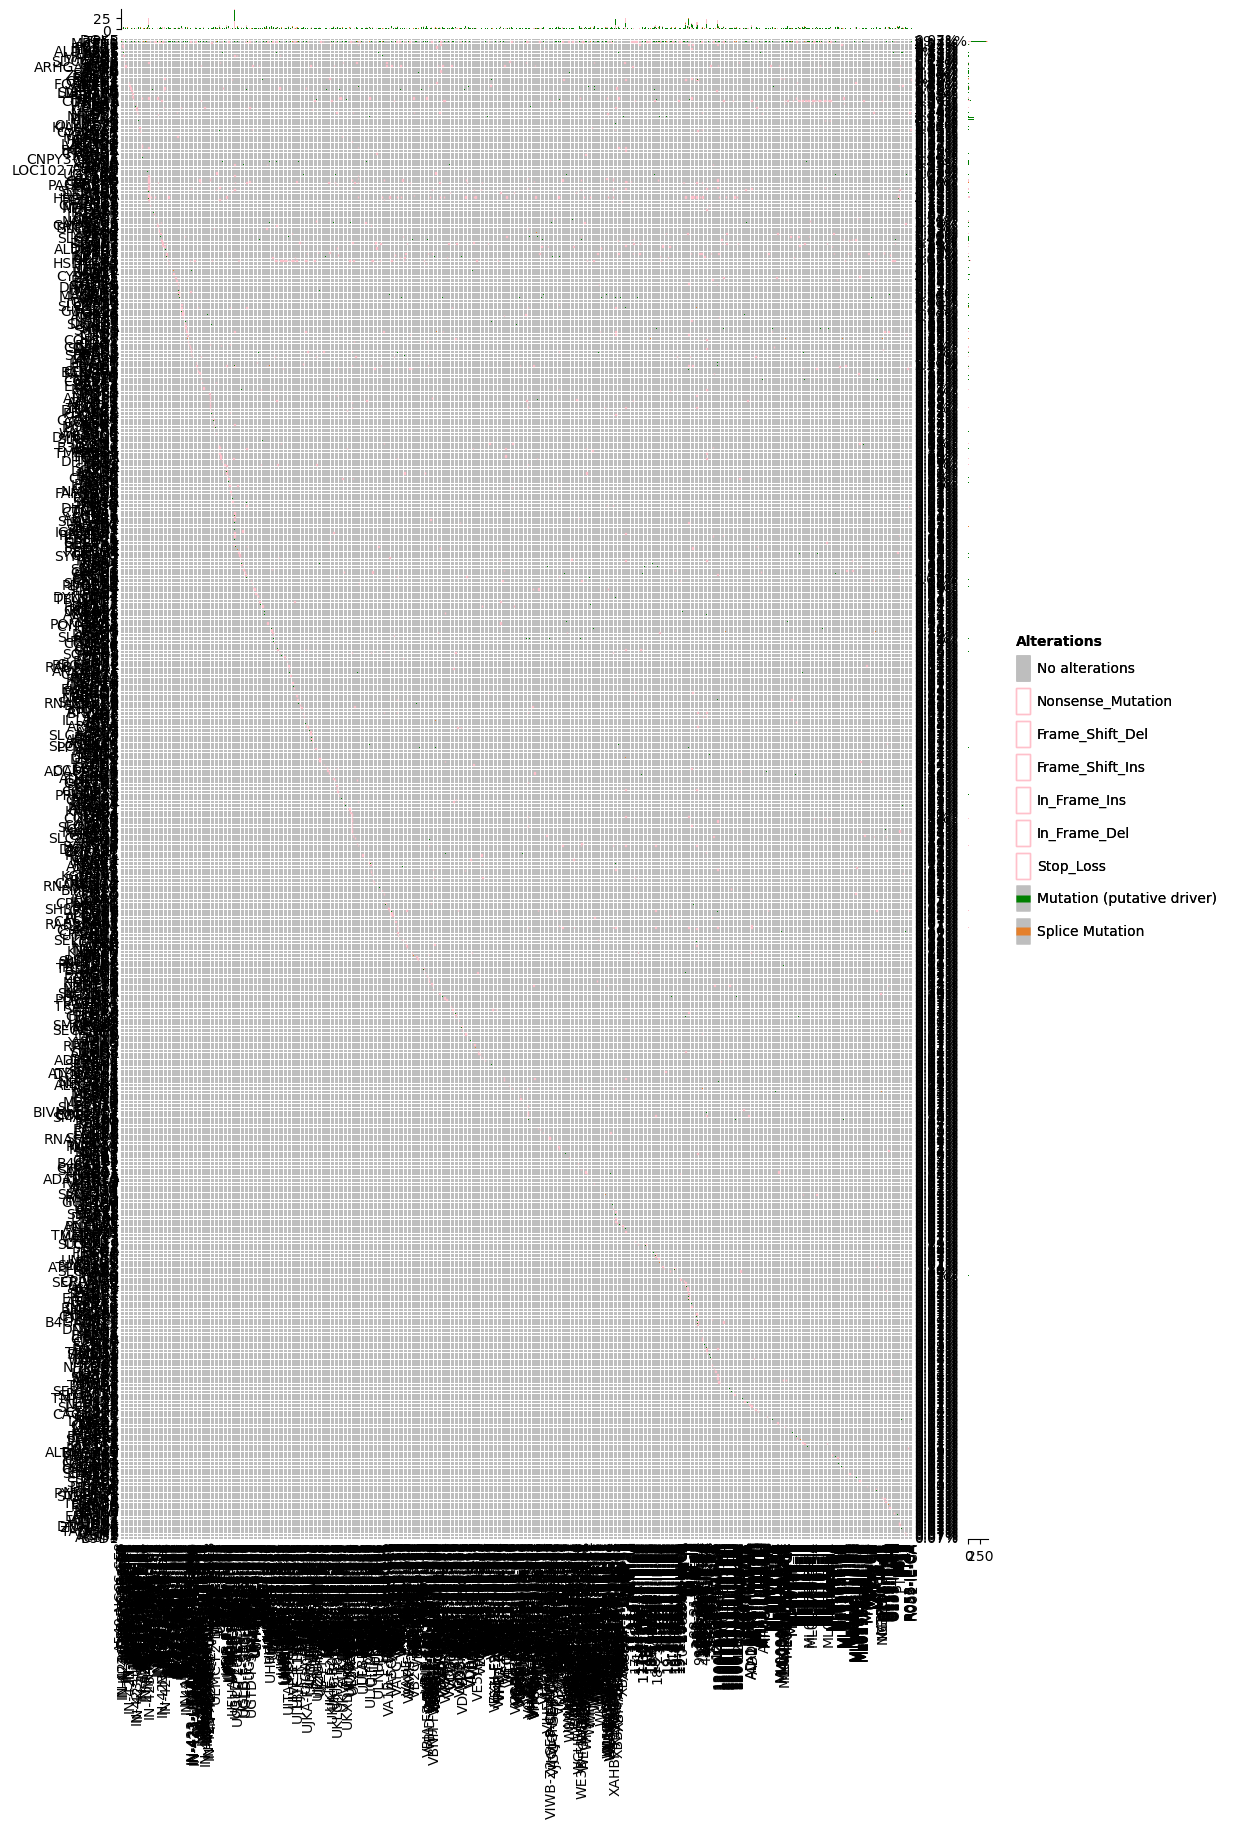

In [39]:
op = OncoPrint(cna, name="main")
op.render()

## Make clinical information



In [24]:
clinical = clinical[op.samples_order]
tumor_type = clinical.loc["Cancer Type Detailed"]
tumor_colors = mp.Colors(tumor_type, label="Tumor Type", label_loc="left")

mut_count = clinical.loc["Mutation Count"]
mut_number = mp.Numbers(mut_count, show_value=False, color="orange")

In [ ]:
clinical.head()

Add clinical to the oncoprint



In [ ]:
op.add_bottom(tumor_colors, size=0.2, pad=0.1)
op.add_bottom(mut_number, size=0.2, name="mutation_count", pad=0.1, legend=False)
op.render()

Append expression to the oncoprint



In [26]:
op /= h
op /= m

Render



In [ ]:
op.set_margin(0.2)
op.add_legends(box_padding=2, stack_size=4)
op.render()
mut_ax = op.get_ax("main", "mutation_count")
mut_ax.set_axis_off()
mut_ax.text(
    0,
    0.5,
    "Mutation Count",
    rotation=0,
    ha="right",
    va="center",
    transform=mut_ax.transAxes,
)